### MNIST Digit classification


Load the database to variable named digit_mnist using the Keras inbuilt datasets (digit_mnist = keras.datasets.mnist)

* Import data to create X_train_full, y_train_full, X_test and y_test variables
* Normalize the data
* Create a validation set of 6000 images
* Create an ANN model with two dense layers of 200 and 100 neurons
* Compile and train the model for 60 epochs
* Plot the loss and accuracy against epoch
* Evaluate the model accuracy on the test dataset
* Predict the digit for the first 5 records of the test dataset

#### Importing the required libraries:

In [43]:
import numpy as np
import pandas as pd
pd.options.display.max_rows=None
pd.options.display.max_columns=None
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import pydot
import graphviz

#### Loading the dataset:

In [4]:
mnist=keras.datasets.mnist
(X_trainfull,y_trainfull),(X_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


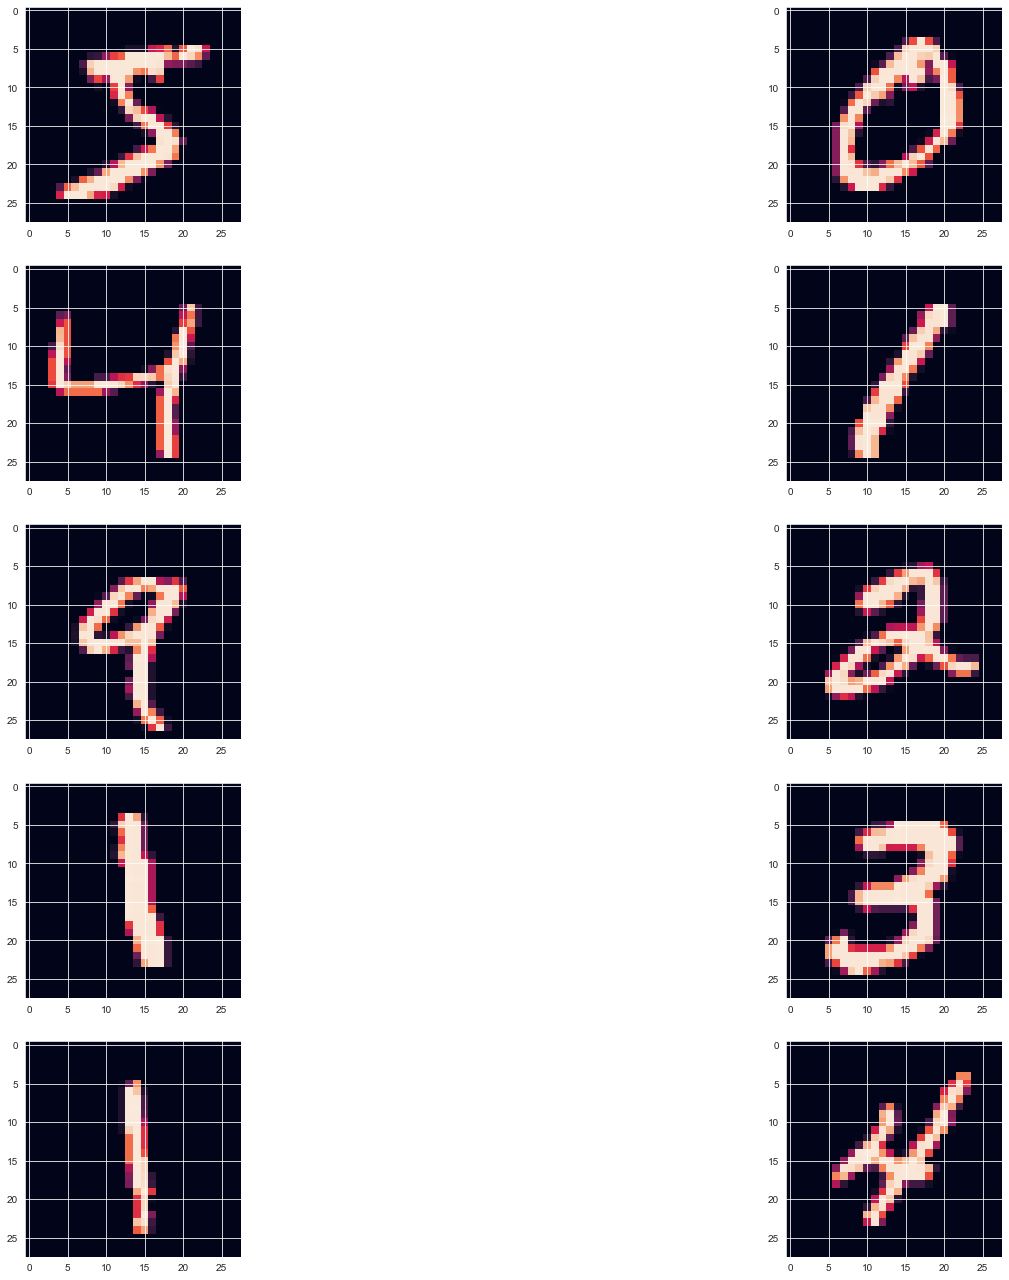

In [87]:
r=range(0,10)
j=1
plt.figure(figsize=(25,23))
for i in r:
    plt.subplot(5,2,j)
    plt.imshow(X_trainfull[i])
    j+=1
plt.show()

In [56]:
for i in r:
    print(y_trainfull[i])

5
0
4
1
9
2
1
3
1
4


In [57]:
# Checking the maximum pixel density:
X_trainfull[:2,5:20]

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154,
         170, 253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253,
         253, 253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253,
         253, 253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253,
         253, 205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154,
         253,  90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0

### Data Normalization:

In [51]:
X_train_n = X_trainfull/255.0
X_test_n = X_test/255.0

### Split the data into train/Validation/test datasets.

In [68]:
X_valid, X_train = X_train_n[:6000], X_train_n[6000:]
y_valid, y_train = y_trainfull[:6000], y_trainfull[6000:]

### Training the ANN Model:

In [58]:
np.random.seed(42)
tf.random.set_seed(42)

In [59]:
mnist_model=keras.models.Sequential()
mnist_model.add(keras.layers.Flatten(input_shape=[28,28]))
mnist_model.add(keras.layers.Dense(200,activation='relu'))
mnist_model.add(keras.layers.Dense(100,activation='relu'))
mnist_model.add(keras.layers.Dense(10,activation='softmax'))
mnist_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


2021-12-13 22:01:09.163131: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [63]:
for i in [1,2]:
    weights, biases = mnist_model.layers[1].get_weights()
    print(f'Weights assigned to {i} hidden layer : ',weights)
    print(f'Biases obtained in {i} hidden layer : ',biases,'\n')

Weights assigned to 1 hidden layer :  [[ 0.02570029 -0.00921319 -0.02297589 ...  0.03759523  0.01990343
  -0.00419658]
 [ 0.0493257   0.07532704  0.04591972 ...  0.01272719  0.07017377
   0.06893378]
 [-0.00902112  0.0490617   0.01508749 ...  0.00632862 -0.02900814
  -0.04371899]
 ...
 [ 0.06044598  0.02830634  0.04788385 ... -0.02156743 -0.06206664
  -0.06688078]
 [ 0.03822813  0.07278952  0.02177001 ... -0.04696669 -0.04292265
   0.0316055 ]
 [-0.01534326 -0.03178874 -0.04308994 ...  0.00643031  0.02572545
  -0.03443564]]
Biases obtained in 1 hidden layer :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

### Compiling and Training the Neural network model:

In [70]:
mnist_model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
mnist_model_history=mnist_model.fit(X_train,y_train,epochs=60,validation_data=(X_valid,y_valid))
print(mnist_model_history.history)
print(mnist_model_history.params,'\n')

Epoch 1/60
1688/1688 [==============================] - 4s 2ms/step - loss: 0.6607 - accuracy: 0.8267 - val_loss: 0.3216 - val_accuracy: 0.9125
Epoch 2/60
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3007 - accuracy: 0.9140 - val_loss: 0.2585 - val_accuracy: 0.9282
Epoch 3/60
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2488 - accuracy: 0.9293 - val_loss: 0.2253 - val_accuracy: 0.9385
Epoch 4/60
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2151 - accuracy: 0.9389 - val_loss: 0.1961 - val_accuracy: 0.9443
Epoch 5/60
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1893 - accuracy: 0.9461 - val_loss: 0.1790 - val_accuracy: 0.9482
Epoch 6/60
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1690 - accuracy: 0.9516 - val_loss: 0.1636 - val_accuracy: 0.9523
Epoch 7/60
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1521 - accuracy: 0.9571 - val_loss: 0.1482 - val_accuracy:

1688/1688 [==============================] - 3s 2ms/step - loss: 0.0091 - accuracy: 0.9993 - val_loss: 0.0791 - val_accuracy: 0.9778
Epoch 58/60
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0088 - accuracy: 0.9992 - val_loss: 0.0775 - val_accuracy: 0.9780
Epoch 59/60
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0085 - accuracy: 0.9994 - val_loss: 0.0798 - val_accuracy: 0.9775
Epoch 60/60
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0081 - accuracy: 0.9993 - val_loss: 0.0804 - val_accuracy: 0.9777
{'loss': [0.6606810092926025, 0.3006501793861389, 0.24880777299404144, 0.2151191383600235, 0.1892891675233841, 0.16900672018527985, 0.15211457014083862, 0.13781435787677765, 0.12602710723876953, 0.11572159826755524, 0.10663806647062302, 0.09908144921064377, 0.09172626584768295, 0.08569604158401489, 0.08015254884958267, 0.07516992837190628, 0.07068935036659241, 0.06590902805328369, 0.06244658678770065, 0.058741774410009384, 0.055

* Accuracy on Train data : 99.93%
* Loss on Train data : 0.0081 

* Validation accuracy: 97.77%
* Validation loss: 0.0804

### Plotting the loss and accuracy against epoch:

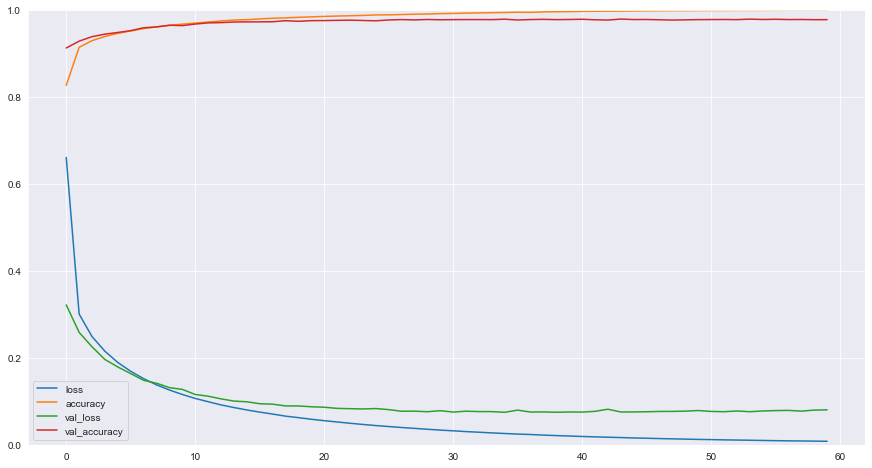

In [80]:
sns.set_style('darkgrid')
pd.DataFrame(mnist_model_history.history).plot(figsize=(15,8))
plt.grid(True,which='major',axis='both')
plt.gca().set_ylim(0,1)
plt.show()

### Evaluate the model accuracy on the test dataset:

In [81]:
mnist_model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 15.9833 - accuracy: 0.9755


[15.983323097229004, 0.9754999876022339]

* Test data accuracy : 97.54%
* Loss : 15.98

### Predict the digit for the first 5 records of the test dataset:

In [82]:
X_new=X_test[:5]
y_pred=mnist_model.predict(X_new)
y_pred

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [84]:
y_predclass=np.argmax(mnist_model.predict(X_new),axis=-1)
print('Digits classified for unseen data : ',y_predclass,'\n')

Digits classified for unseen data :  [7 2 1 0 4] 



### Comaparison with Test data:

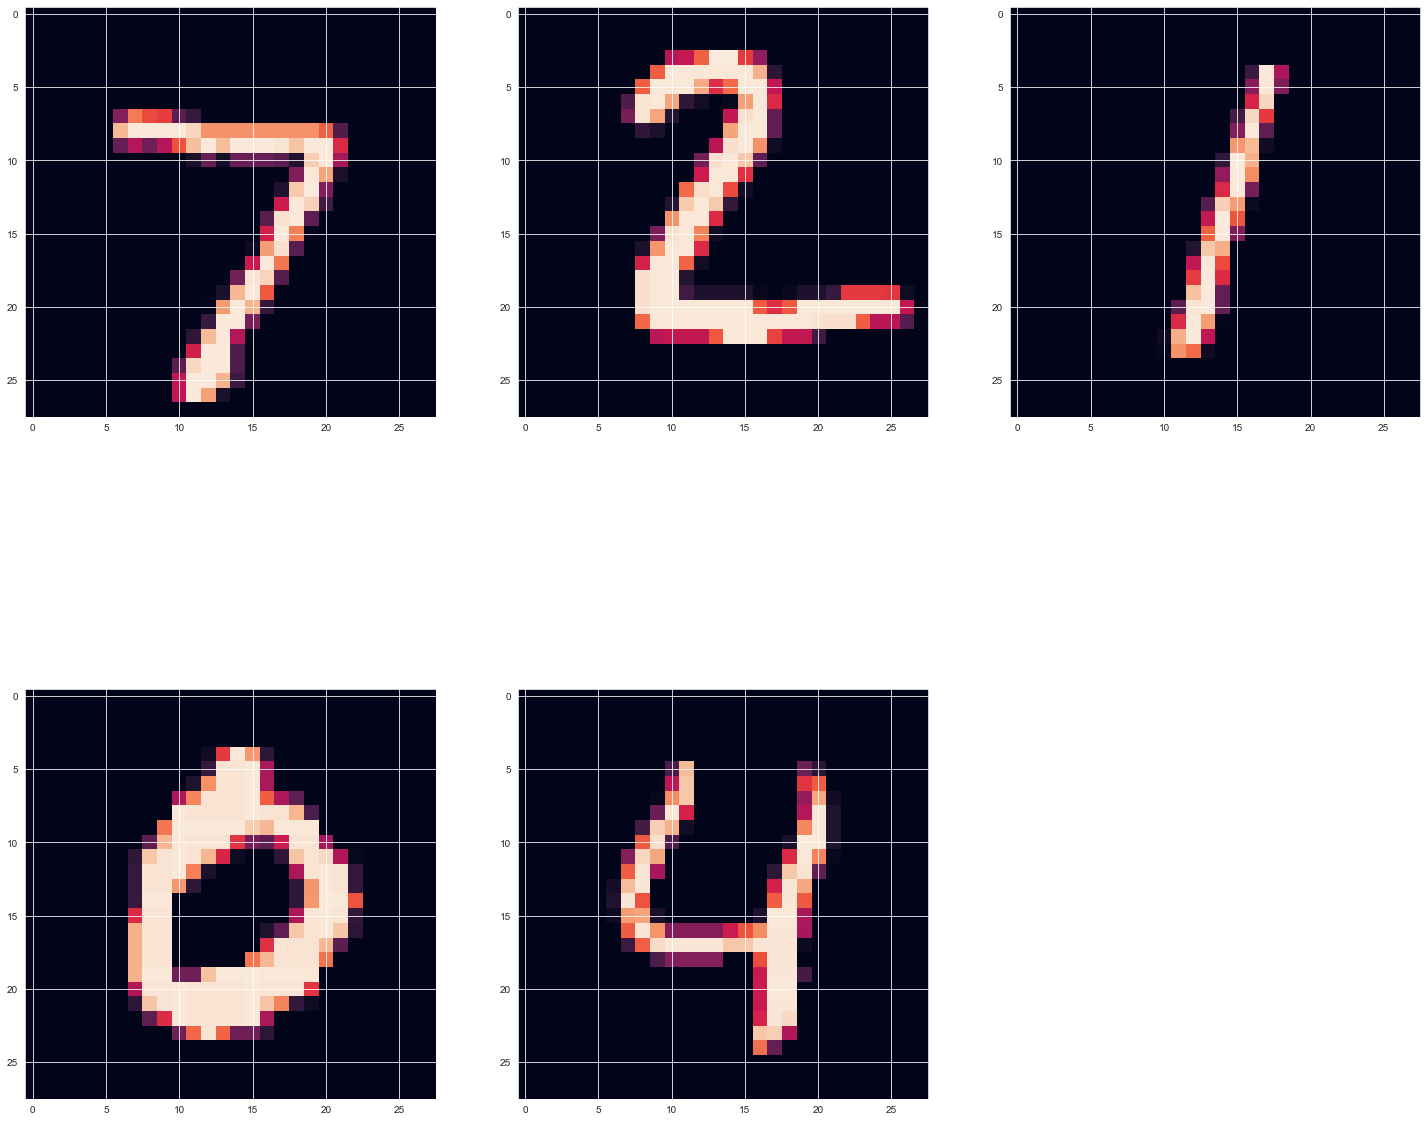

Digits classified for the same data points :  [7 2 1 0 4]


In [88]:
r=range(0,5)
j=1
plt.figure(figsize=(25,23))
for i in r:
    plt.subplot(2,3,j)
    plt.imshow(X_test[i])
    j+=1
plt.show()
print('Digits classified for the same data points : ',y_predclass)